In [1]:
# Libraries
from waveome.model_search import GPKernelSearch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#pip install tensorflow

In [3]:
#pip install tensorflow_probability

In [4]:
#pip install gpflow

In [5]:
metadata = pd.read_csv("/Users/rahlab/DataspellProjects/waveome/examples/Marine_microbiome/data/metadata.csv")
microbiome = pd.read_csv("/Users/rahlab/DataspellProjects/waveome/examples/Marine_microbiome/data/microbiome.csv")
outcomes = microbiome.iloc[:,3:]
#print(outcomes.iloc[:, 1:5])

In [23]:
df = pd.DataFrame(
    {
        'sample_id': metadata['Sample_Id'],
        'sample_name': metadata['Sample_name'],
        'depth' : metadata['depth_(m)'],
        'time': metadata['Time'],
        'chemistry': metadata['chemistry'],
    }
).sort_values(['sample_id', 'time'])

for col  in outcomes.iloc[:,:]:
    df[col] = outcomes[col]

print(f'Dimension of dataset: {df.shape}')

df.head()

/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_2592/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = outcomes[col]
/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_2592/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = outcomes[col]
/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_2592/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

Dimension of dataset: (42, 7193)


sample_id sample_name  depth  time chemistry  Acanthamoeba_castellanii  \
0          1  HOT194_25m     25     0      flex                         0   
1          2  HOT195_25m     25    30      flex                         1   
2          3  HOT196_25m     25    57      flex                         0   
3          4  HOT197_25m     25   117      flex                         0   
4          5  HOT198_25m     25   136      flex                         0   

   Acanthamoeba_polyphaga_mimivirus  Acanthocystis_turfacea_Chlorella_virus_1  \
0                                39                                         8   
1                                51                                        11   
2                                15                                         4   
3                                54                                        20   
4                                27                                        15   

   Acaryochloris  Acaryochloris_marina_MBIC11017  ...  Vibrio_phage_fs2  \
0             15                              43  ...               NaN   
1             13                              31  ...               NaN   
2             16                              18  ...               NaN   
3             18                              38  ...               NaN   
4             23                              26  ...               NaN   

   Triticeae  Paretroplus_maculatus  Lactococcus_phage_P335_sensu_lato  \
0        NaN                    NaN                                NaN   
1        NaN                    NaN                                NaN   
2        NaN                    NaN                                NaN   
3        NaN                    NaN                                NaN   
4        NaN                    NaN                                NaN   

   Burkholderia_phage_KL3  Ureaplasma_parvum_serovar_14_str._ATCC_33697  \
0                     NaN                                           NaN   
1                     NaN                                           NaN   
2                     NaN                                           NaN   
3                     NaN                                           NaN   
4                     NaN                                           NaN   

   Actinobacillus_pleuropneumoniae_serovar_9_str._CVJ13261  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Mycobacterium_africanum_GM041182  Igernella_notabilis  \
0                               NaN                  NaN   
1                               NaN                  NaN   
2                               NaN                  NaN   
3                               NaN                  NaN   
4                               NaN                  NaN   

   Francisella_tularensis_subsp._holarctica_257  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  

[5 rows x 7193 columns]

In [24]:
column_names = df.columns.tolist()
print(column_names[5:])

['Acanthamoeba_castellanii', 'Acanthamoeba_polyphaga_mimivirus', 'Acanthocystis_turfacea_Chlorella_virus_1', 'Acaryochloris', 'Acaryochloris_marina_MBIC11017', 'Acetivibrio_cellulolyticus_CD2', 'Acetobacter', 'Acetobacter_aceti_NBRC_14818', 'Acetobacter_pomorum_DM001', 'Acetobacter_tropicalis_NBRC_101654', 'Acetobacteraceae', 'Acetohalobium_arabaticum_DSM_5501', 'Acetonema_longum_DSM_6540', 'Achromobacter', 'Achromobacter_arsenitoxydans_SY8', 'Achromobacter_denitrificans', 'Achromobacter_piechaudii_ATCC_43553', 'Achromobacter_xylosoxidans_A8', 'Acidaminococcaceae', 'Acidaminococcus', 'Acidaminococcus_fermentans_DSM_20731', 'Acidianus_filamentous_virus_3', 'Acidianus_hospitalis_W1', 'Acidimicrobium_ferrooxidans_DSM_10331', 'Acidiphilium', 'Acidiphilium_multivorum_AIU301', 'Acidithiobacillus', 'Acidithiobacillus_caldus', 'Acidithiobacillus_caldus_ATCC_51756', 'Acidithiobacillus_ferrivorans_SS3', 'Acidithiobacillus_ferrooxidans', 'Acidithiobacillus_ferrooxidans_ATCC_23270', 'Acidithiobaci

In [25]:
x = (df.loc[:, 'time'])

"for i in df.iloc[:, 5:]:\n    plt.figure(figsize=(7.2,4))\n    plt.plot(df.loc[:,'time'], df.loc[:, i])\n    plt.title(i)\n    plt.xlabel('Time')\n    plt.savefig(os.path.join(save_dir, f'{i}.png'))\n    plt.show()"

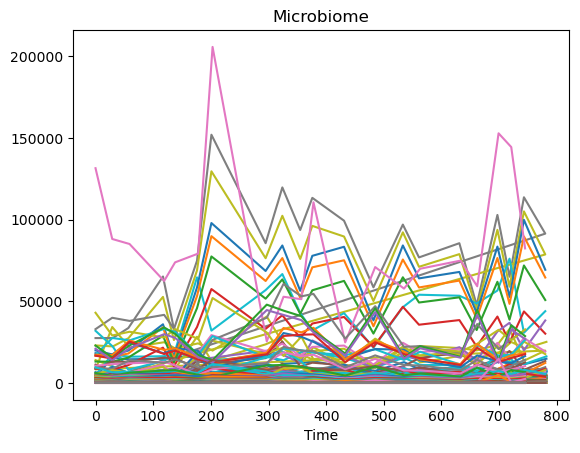

In [26]:
'''for i in outcomes:
    plt.plot(df.loc[:, 'time'], df.loc[:, i])
    plt.title(i)
    plt.xlabel('Time')
    plt.figure(figsize=(7.2,3.6))
'''
save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

for i in df.iloc[:, 5:]:
    plt.plot(df.loc[:,'time'], df.loc[:, i])
plt.title('Microbiome')
plt.xlabel('Time')
plt.savefig(os.path.join(save_dir, 'Microbiome.png'))

#Create a plot for each microbiome
'''for i in df.iloc[:, 5:]:
    plt.figure(figsize=(7.2,4))
    plt.plot(df.loc[:,'time'], df.loc[:, i])
    plt.title(i)
    plt.xlabel('Time')
    plt.savefig(os.path.join(save_dir, f'{i}.png'))
    plt.show()'''

In [27]:
# Factorize categorical columns
df["sample_id"], subject_vals = pd.factorize(df["sample_id"])
df["depth"], subject_vals = pd.factorize(df["depth"])
df["chemistry"], chemistry = pd.factorize(df["chemistry"])
df[["sample_id", "depth", "time", "chemistry"]] = df[["sample_id", "depth", "time", "chemistry"]].astype(float)

In [28]:
X = df[['sample_id', 'depth', 'time', 'chemistry']]
X.head()

sample_id  depth   time  chemistry
0        0.0    0.0    0.0        0.0
1        1.0    0.0   30.0        0.0
2        2.0    0.0   57.0        0.0
3        3.0    0.0  117.0        0.0
4        4.0    0.0  136.0        0.0

In [29]:
df[column_names[5:]] = df[column_names[5:]].astype(float)
Y = df[column_names[5:]]
Y.head()

Acanthamoeba_castellanii  Acanthamoeba_polyphaga_mimivirus  \
0                       0.0                              39.0   
1                       1.0                              51.0   
2                       0.0                              15.0   
3                       0.0                              54.0   
4                       0.0                              27.0   

   Acanthocystis_turfacea_Chlorella_virus_1  Acaryochloris  \
0                                       8.0           15.0   
1                                      11.0           13.0   
2                                       4.0           16.0   
3                                      20.0           18.0   
4                                      15.0           23.0   

   Acaryochloris_marina_MBIC11017  Acetivibrio_cellulolyticus_CD2  \
0                            43.0                            31.0   
1                            31.0                            25.0   
2                            18.0                            10.0   
3                            38.0                            24.0   
4                            26.0                            25.0   

   Acetobacter  Acetobacter_aceti_NBRC_14818  Acetobacter_pomorum_DM001  \
0         28.0                          38.0                       11.0   
1         17.0                          41.0                       13.0   
2         13.0                          14.0                        3.0   
3         21.0                          18.0                       10.0   
4         22.0                          32.0                       20.0   

   Acetobacter_tropicalis_NBRC_101654  ...  Vibrio_phage_fs2  Triticeae  \
0                                50.0  ...               NaN        NaN   
1                                34.0  ...               NaN        NaN   
2                                13.0  ...               NaN        NaN   
3                                23.0  ...               NaN        NaN   
4                                31.0  ...               NaN        NaN   

   Paretroplus_maculatus  Lactococcus_phage_P335_sensu_lato  \
0                    NaN                                NaN   
1                    NaN                                NaN   
2                    NaN                                NaN   
3                    NaN                                NaN   
4                    NaN                                NaN   

   Burkholderia_phage_KL3  Ureaplasma_parvum_serovar_14_str._ATCC_33697  \
0                     NaN                                           NaN   
1                     NaN                                           NaN   
2                     NaN                                           NaN   
3                     NaN                                           NaN   
4                     NaN                                           NaN   

   Actinobacillus_pleuropneumoniae_serovar_9_str._CVJ13261  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Mycobacterium_africanum_GM041182  Igernella_notabilis  \
0                               NaN                  NaN   
1                               NaN                  NaN   
2                               NaN                  NaN   
3                               NaN                  NaN   
4                               NaN                  NaN   

   Francisella_tularensis_subsp._holarctica_257  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  

[5 rows x 7188 columns]

In [30]:
# Load the information into the Gaussian process search object
gps = GPKernelSearch(
    X=df[['sample_id','depth', 'time', 'chemistry']],
    Y=df[column_names[5:]],
    unit_col= 'sample_id',
    categorical_vars=['depth', 'chemistry'],
    outcome_likelihood='gaussian'
)

In [31]:
gps.run_search(
    random_seed= 5
)

Kernel search:   2%|▏         | 157/7188 [40:41<46:42:51, 23.92s/it]/Users/rahlab/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Kernel search:   6%|▌         | 442/7188 [1:42:45<10:04:42,  5.38s/it]

IndexError with index 2 in kernel_parts ['categorical[3]', 'squared_exponential[2]']
IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:   9%|▉         | 660/7188 [2:31:23<32:18:44, 17.82s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:   9%|▉         | 665/7188 [2:32:16<24:30:31, 13.53s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:   9%|▉         | 668/7188 [2:33:18<32:50:37, 18.13s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  13%|█▎        | 938/7188 [3:42:50<44:49:29, 25.82s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'squared_exponential[2]']


Kernel search:  22%|██▏       | 1575/7188 [6:01:25<17:19:25, 11.11s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  24%|██▍       | 1744/7188 [6:29:03<77:09:24, 51.02s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  30%|██▉       | 2142/7188 [8:01:43<20:58:41, 14.97s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  31%|███       | 2226/7188 [8:22:30<10:51:50,  7.88s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  33%|███▎      | 2381/7188 [8:55:17<16:12:52, 12.14s/it]

IndexError with index 2 in kernel_parts ['categorical[3]', 'squared_exponential[2]']


Kernel search:  34%|███▍      | 2445/7188 [9:11:45<18:19:09, 13.90s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  35%|███▍      | 2489/7188 [9:21:38<12:49:33,  9.83s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  40%|███▉      | 2852/7188 [10:50:10<8:26:02,  7.00s/it] 

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  41%|████      | 2937/7188 [11:02:27<26:14:01, 22.22s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'squared_exponential[2]']


Kernel search:  41%|████▏     | 2983/7188 [11:15:07<11:59:00, 10.26s/it]

IndexError with index 2 in kernel_parts ['categorical[3]', 'squared_exponential[2]']


Kernel search:  43%|████▎     | 3058/7188 [11:37:28<21:40:21, 18.89s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  45%|████▌     | 3252/7188 [12:22:14<14:26:18, 13.21s/it]

IndexError with index 2 in kernel_parts ['categorical[3]', 'squared_exponential[2]']


Kernel search:  46%|████▋     | 3337/7188 [12:41:38<21:03:59, 19.69s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']
IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  59%|█████▉    | 4228/7188 [17:01:02<4:08:54,  5.05s/it] 

IndexError with index 2 in kernel_parts ['categorical[0]', 'categorical[1]']


Kernel search:  73%|███████▎  | 5254/7188 [17:55:22<17:04:43, 31.79s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'squared_exponential[2]']


Kernel search:  79%|███████▉  | 5667/7188 [21:23:02<7:38:08, 18.07s/it] 

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  79%|███████▉  | 5668/7188 [21:23:20<7:41:24, 18.21s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']
IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  79%|███████▉  | 5701/7188 [21:32:57<3:56:28,  9.54s/it] 

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  79%|███████▉  | 5712/7188 [21:35:16<3:56:46,  9.62s/it]

IndexError with index 2 in kernel_parts ['categorical[1]', 'categorical[3]']


Kernel search:  81%|████████  | 5840/7188 [21:55:58<2:54:57,  7.79s/it]

IndexError with index 2 in kernel_parts ['categorical[3]', 'squared_exponential[2]']


Kernel search:  91%|█████████ | 6542/7188 [23:02:50<33:23,  3.10s/it]  /Users/rahlab/DataspellProjects/waveome/waveome/model_search.py:2630: RuntimeWarning: invalid value encountered in double_scalars
  total_rsq = 1 - (ssr_total/sse)
Kernel search:  91%|█████████ | 6545/7188 [23:03:09<1:03:08,  5.89s/it]/Users/rahlab/DataspellProjects/waveome/waveome/model_search.py:2630: RuntimeWarning: invalid value encountered in double_scalars
  total_rsq = 1 - (ssr_total/sse)
Kernel search:  91%|█████████▏| 6565/7188 [23:04:19<31:13,  3.01s/it]  /Users/rahlab/DataspellProjects/waveome/waveome/model_search.py:2630: RuntimeWarning: invalid value encountered in double_scalars
  total_rsq = 1 - (ssr_total/sse)
Kernel search: 100%|██████████| 7188/7188 [23:27:47<00:00, 11.75s/it]


In [32]:
gps.models['Acanthamoeba_polyphaga_mimivirus']

{'models': {'categorical[0]+categorical[3]+squared_exponential[2]+categorical[1]*squared_exponential[2]': {'kernel': <gpflow.kernels.base.Sum object at 0x7fc3835ccb80>
╒════════════════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤══════════╕
│ name                                   │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │    value │
╞════════════════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪══════════╡
│ Sum.kernels[0].variance                │ Parameter │ Softplus    │ Uniform │ True        │ ()      │ float64 │ 95.7951  │
├────────────────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ Sum.kernels[1].variance                │ Parameter │ Softplus    │ Uniform │ True        │ ()      │ float64 │ 72.5029  │
├────────────────────────────────────────┼───────────┼─────────────┼─────────┼──────────

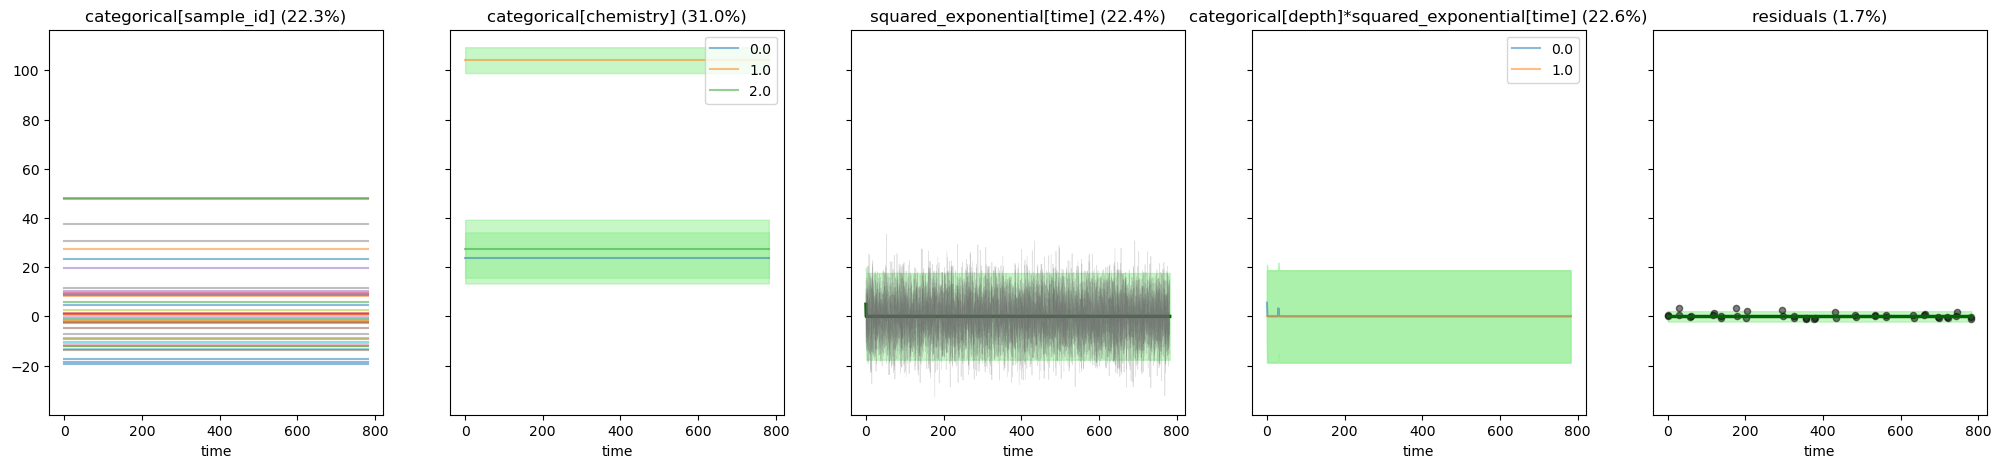

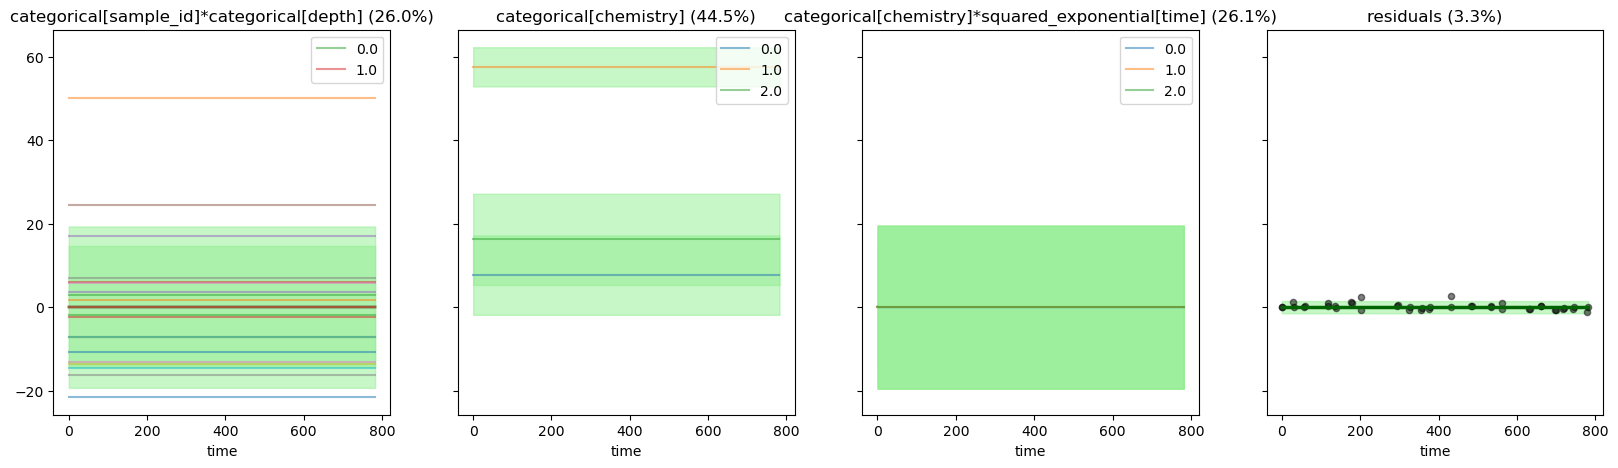

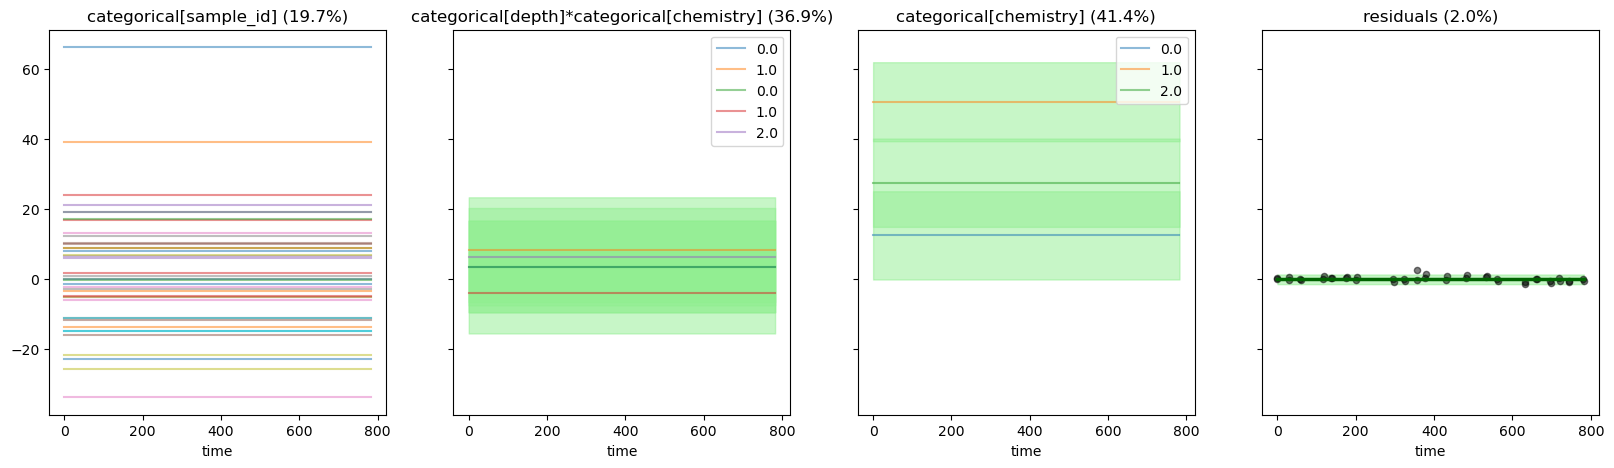

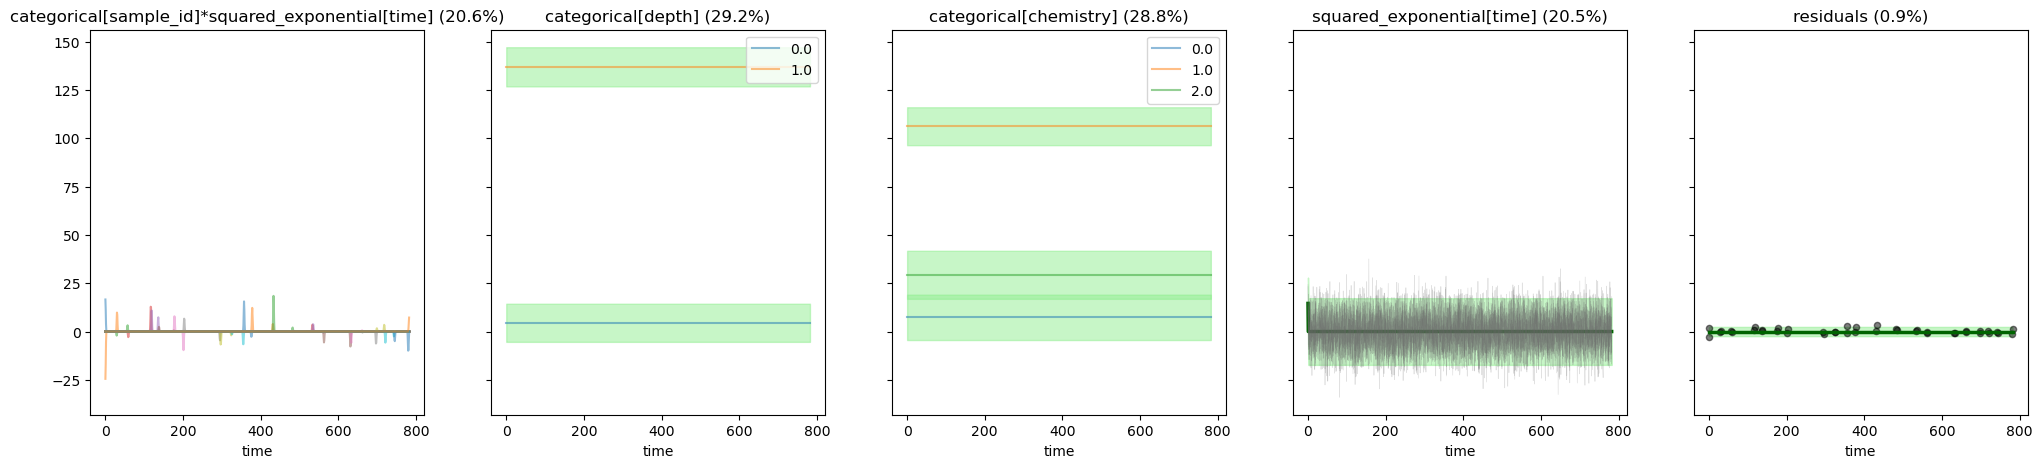

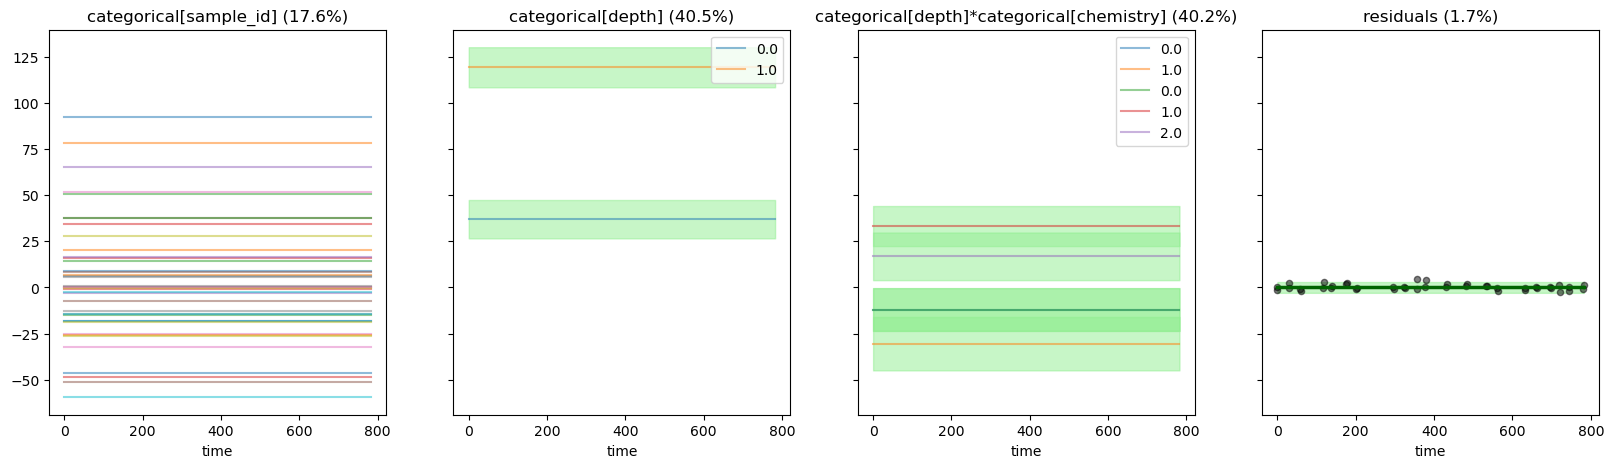

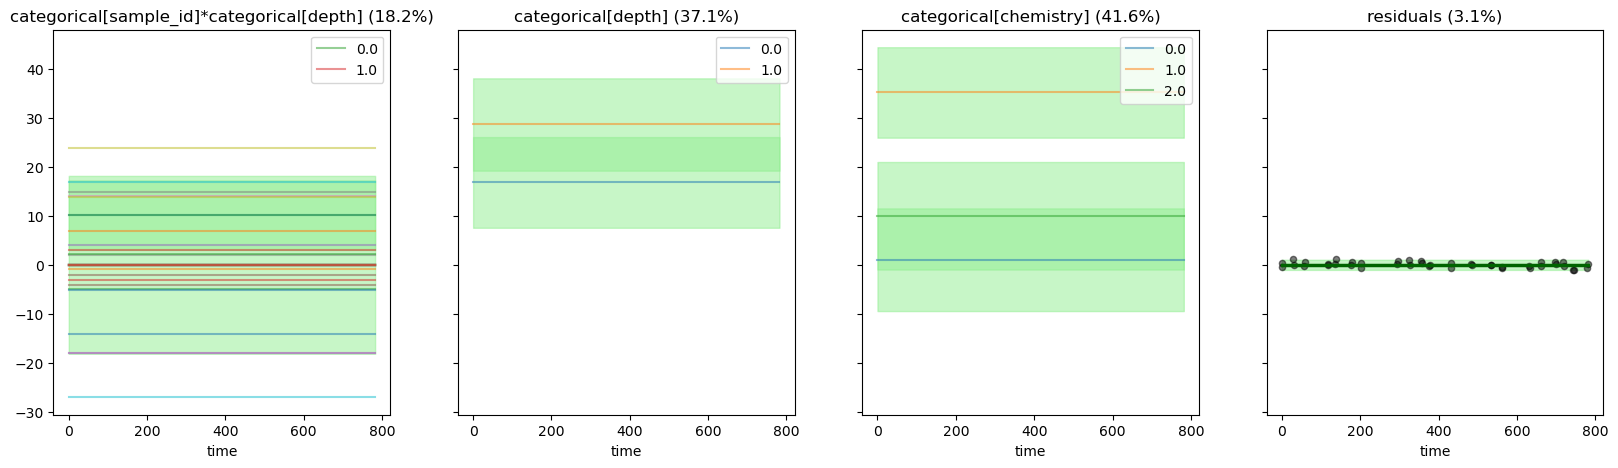

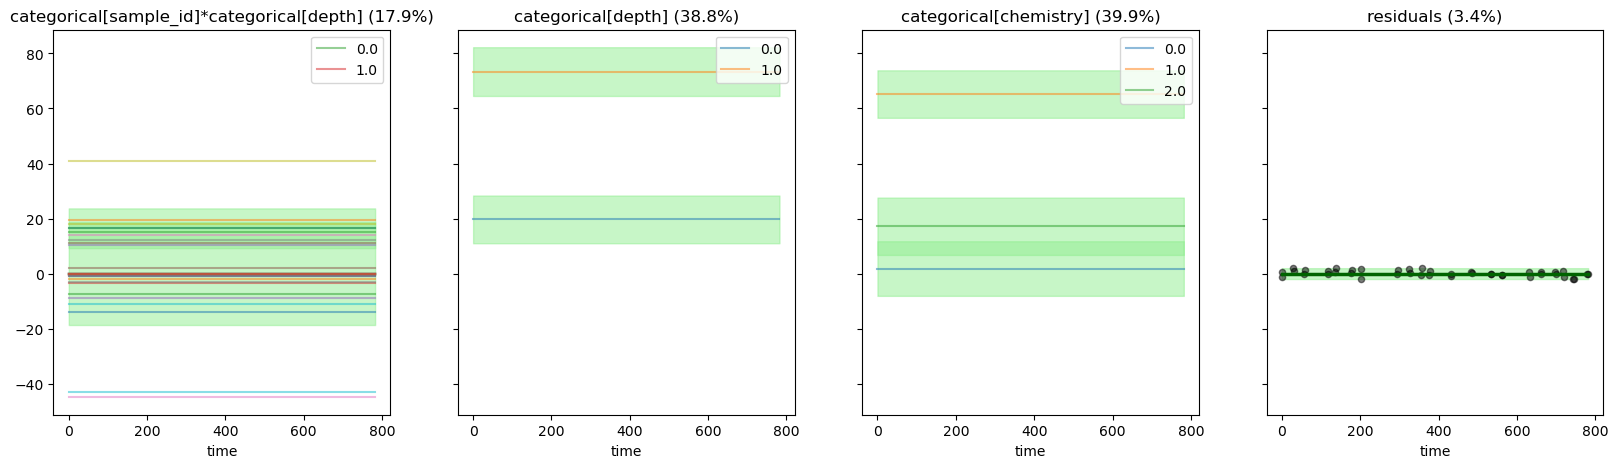

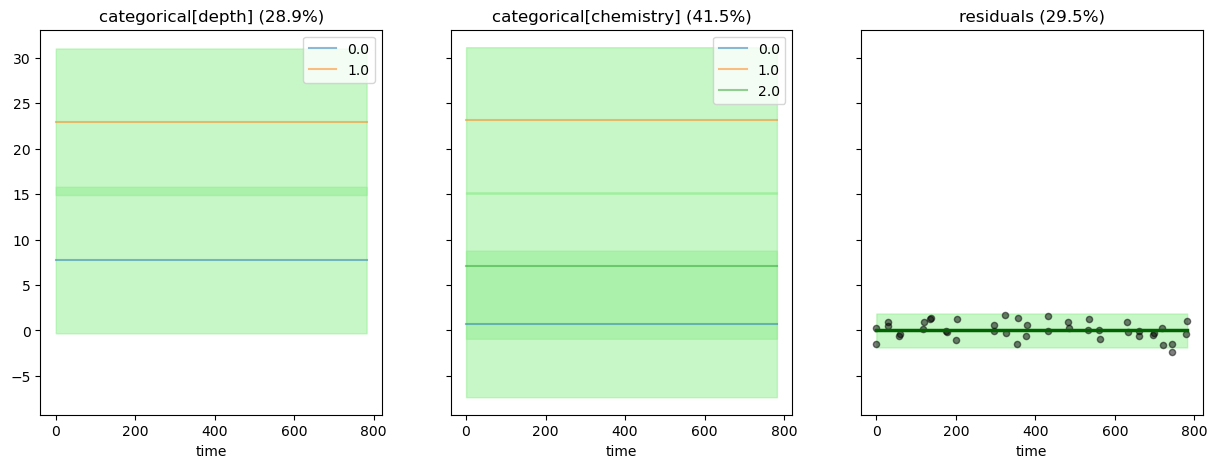

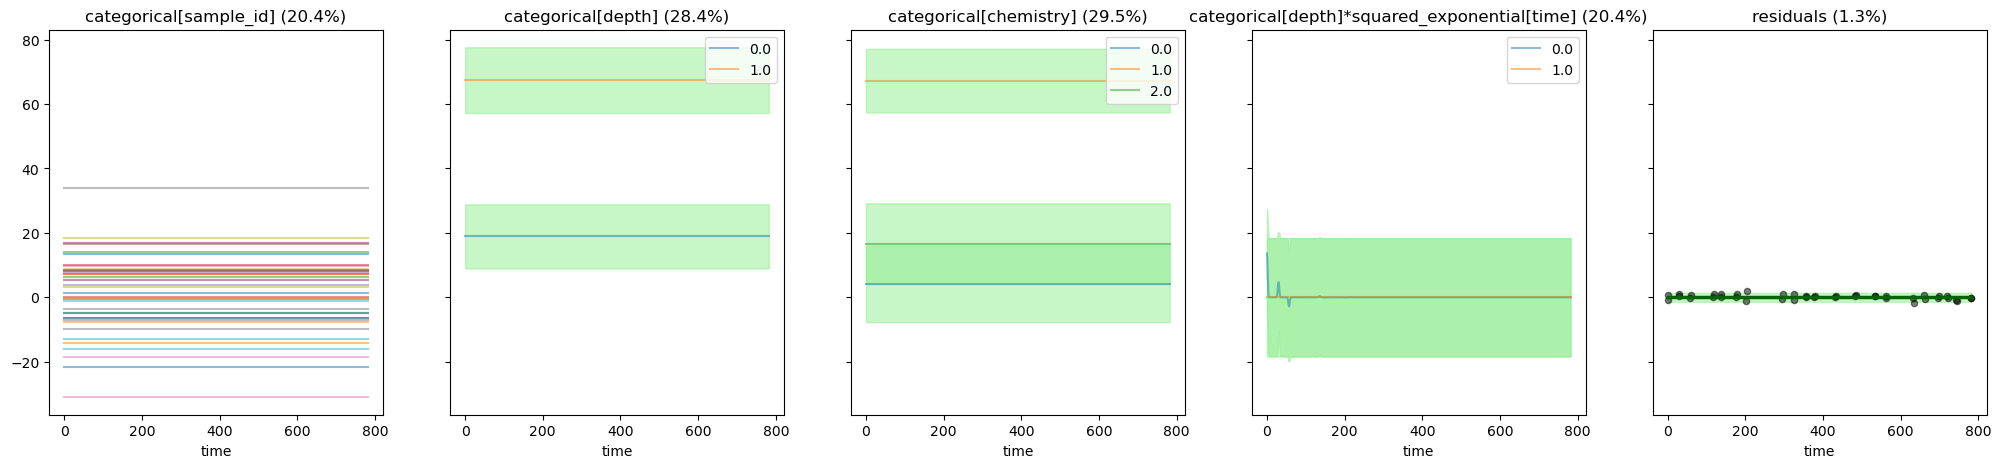

In [16]:
# Now after the search is finished we can inspect the
# additive components selected for each outcome
'''gps.plot_parts(
    out_label='outcome1',
    x_axis_label='time'
);
'''
'''save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

for i in df.iloc[:, 5:]:
    gps.plot_parts(
        out_label=i,
        x_axis_label='time',
    )
    plt.savefig(os.path.join(save_dir, f'Parts_plot_{i}.png'))'''

In [17]:
'''gps.plot_parts(
    out_label='Acanthamoeba_polyphaga_mimivirus',
    x_axis_label='time'
)
plt.savefig(os.path.join(save_dir, 'Parts_plot_Acanthamoeba_polyphaga_mimivirus.png'))'''

"gps.plot_parts(\n    out_label='Acanthamoeba_polyphaga_mimivirus',\n    x_axis_label='time'\n)\nplt.savefig(os.path.join(save_dir, 'Parts_plot_Acanthamoeba_polyphaga_mimivirus.png'))"

In [18]:
'''gps.plot_parts(
    out_label='outcome3',
    x_axis_label='time'
);'''

"gps.plot_parts(\n    out_label='outcome3',\n    x_axis_label='time'\n);"

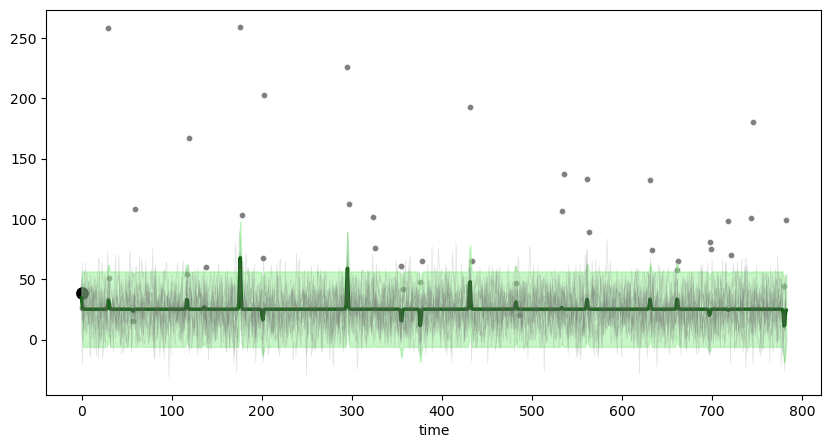

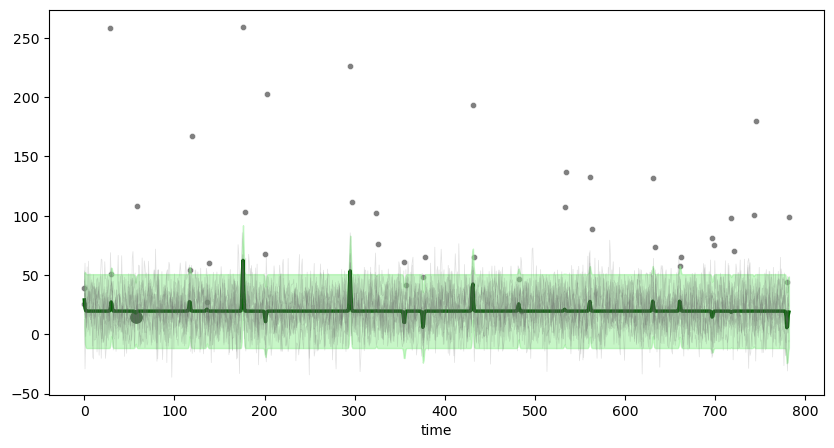

In [33]:
# Plot some of the posterior mean functions for individuals in the dataset
# This is done with the unit_label argument
gps.plot_marginal(
    out_label='Acanthamoeba_polyphaga_mimivirus',
    x_axis_label='time',
    unit_label=0
)
plt.savefig(os.path.join(save_dir, f'Marginal_plot_Acanthamoeba_polyphaga_mimivirus.png'))

gps.plot_marginal(
    out_label='Acanthamoeba_polyphaga_mimivirus',
    x_axis_label='time',
    unit_label=2
)
plt.savefig(os.path.join(save_dir, f'Marginal_plot2_Acanthamoeba_polyphaga_mimivirus.png'))

In [34]:
gps.plot_heatmap(var_cutoff=0.1);
plt.savefig(os.path.join(save_dir, 'Heatmap.png'))

ValueError: NumPy boolean array indexing assignment cannot assign 11742 input values to the 11748 output values where the mask is true